# [LEGALST-123] Lab 04: Probability Distributions, Bootstrap, and Confidence Intervals

In [1]:
from datascience import *
from collections import Counter
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data

For this lab, we'll be using the American National Election Studies (ANES) data from the 2016 election. The codebook is available here: https://electionstudies.org/data-center/anes-2016-pilot-study/

In [2]:
# use the same data set as the previous and future labs
anes = pd.read_csv('../data/anes/anes_pilot_2016.csv')
anes.head()

,version,caseid,weight,weight_spss,follow,turnout12,turnout12b,vote12,percent16,meet,...,flag_asianam10,flag_nativeam10,flag_other10,starttime,endtime,optintimestamp,count,ua,browser,os
0,ANES 2016 Pilot Study version 20160223,1,0.951160,0.542161,1,1,9,2,100,1,...,0,0,0,1/22/2016,1/22/2016,,173,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:43.0) G...,Firefox 43,Windows 7
1,ANES 2016 Pilot Study version 20160223,2,2.670196,1.522012,2,2,9,9,50,4,...,0,0,0,1/22/2016,1/22/2016,,87,Mozilla/5.0 (Linux; Android 6.0; LGLS991 Build...,Chrome 47,Android Linux 6.0
2,ANES 2016 Pilot Study version 20160223,3,1.430390,0.815322,1,1,9,1,100,1,...,0,0,0,1/22/2016,1/22/2016,,86,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,Safari 9,Mac OS X 10.9
3,ANES 2016 Pilot Study version 20160223,4,0.913966,0.520961,1,1,9,2,100,5,...,0,0,0,1/22/2016,1/22/2016,,211,Mozilla/5.0 (Android 5.1.1; Mobile; rv:43.0) G...,Firefox 43,Android 5.1
4,ANES 2016 Pilot Study version 20160223,5,0.263935,0.150443,1,1,9,1,100,2,...,0,0,0,1/23/2016,1/23/2016,,342,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,Safari 9,iPhone iOS 9.2


## Exploratory Data Analysis

Refer back to lab 1 for help plotting histograms.

Write code that plots a histogram of the "Feeling Thermometer - Barack Obama" variable. What is the shape of the plot? Report the 25th, 50th, and 75th percentiles. Keep in mind that valid answers have domain [0,100].

<Axes: >

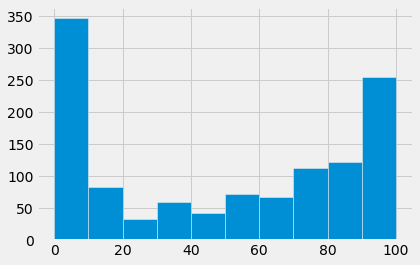

In [3]:
anes[anes["ftobama"] < 101].loc[:, "ftobama"].hist()

What is the shape of the plot?

There are two distinct peaks, so the distribution is bimodal. The left peak is also higher than the right peak.

Report the 25th, 50th, and 75th percentiles. Keep in mind that valid answers have domain [0,100].

In [4]:
obama = anes[anes["ftobama"] < 101].loc[:, "ftobama"]
obama.quantile(q=.25)

5.0

In [5]:
obama.quantile(q=.5)

52.5

In [6]:
obama.quantile(q=.75)

87.0

What does this distrubtion tell you about the American peoples' thoughts on Obama?

People have very strong opinions regarding Obama; they either love him, or they hate him. The people in the very middle of the distribution, however, feel indifferent.

### Question 1

Now do the same for "Feeling Thermometer - Donald Trump." How do the two distributions compare?

<Axes: >

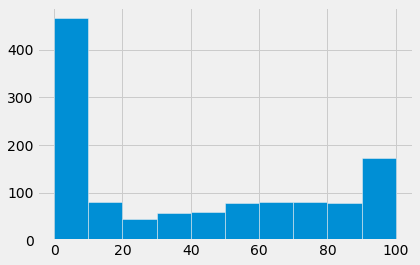

In [7]:
anes[anes["fttrump"] < 101].loc[:, "fttrump"].hist()

In [8]:
trump = anes[anes["fttrump"] < 101].loc[:, "fttrump"]
trump.quantile(q=.25)

2.0

In [9]:
trump.quantile(q=.5)

30.0

In [10]:
trump.quantile(q=.75)

72.0

How do the two distributions compare?

The distributions are similar; both are bimodal with the peaks around 0 and 100. However, Trump appears more polarizing, and the 50-percentile is also lower than Obama's at 30.

Both distributions have a significant amount of their points at the two extremes (0 or 100). What does this tell you about the standard deviation of the data? Do the American people have strong opinions regarding these two candidates?

The standard deviation should be very large, and the American people have very strong opinions regarding Obama and Trump.

## Bootstrap

Write code that resamples the "ftobama" distribution, then plot a histogram. Be sure to resample the number of rows that exist in the dataset, with replacement.

In [11]:
obama.size

1198

In [12]:
resample = obama.sample(n=1198, replace=True)

<Axes: >

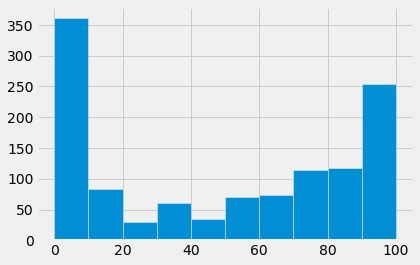

In [13]:
resample.hist()

In [14]:
resample.quantile(q=.5)

53.0

### Question 2

How does the resampled median compare to the original median? Does this result make sense?

The resampled median is similar to the original median. This makes sense because we are using 1198 bootstrapped samples, and the original number of rows is also 1198. This means that we are taking enough samples, even with replacement, to adequately represent the original distribution.

Now, define a function titled "bootstrap_median" that takes the original sample, the column name we're concerned with, and the number of resamples as arguments. The function shold calculate medians and return them in an array.

In [15]:
def bootstrap_median(original_sample, label, replications):
    """Returns an array of bootstrapped sample medians:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    just_one_column = original_sample.loc[:, label]
    medians = []
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample(n=just_one_column.size, replace=True)
        resampled_median = bootstrap_sample.quantile(.5)
        medians.append(resampled_median)

    return medians

Replicate the bootstrap 10,000 times, then plot the results.

In [16]:
medians = bootstrap_median(anes, 'ftobama', 10000)

Plot a histogram of the resampled medians, and plot the 95% confidence interval.

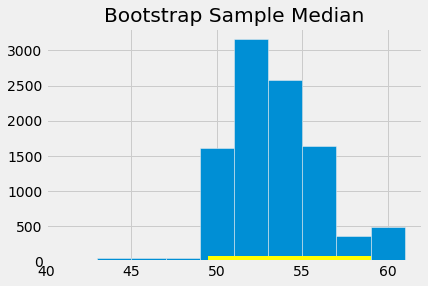

In [17]:
resampled_medians = pd.DataFrame(data={'Bootstrap Sample Median': medians})
resampled_medians.hist()
plots.plot(np.array([pd.Series(medians).quantile(q=.025), pd.Series(medians).quantile(q=.975)]), np.array([0, 0]), color='yellow', lw=10, zorder=1)

### Question 3

What can you infer about the likely population median given the above distribution?

The distribution is skewed right, and the likely population median should be between 50 and 60.

Finally, write a simulation that constructs 100 confidence intervals. (Remember to use the 2.5 and 97.5 percentiles!)

In [18]:
left_ends = []
right_ends = []

for i in np.arange(100):
    first_sample = obama.sample(n=500, replace=True).to_frame()
    medians = bootstrap_median(first_sample, 'ftobama', 5000)
    left_ends.append(pd.Series(medians).quantile(q=.025))
    right_ends.append(pd.Series(medians).quantile(q=.975))

intervals = pd.DataFrame(data={"Left": left_ends, "Right": right_ends})

#### Question 4

Finally, plot 100 confidence intervals (stacked on top of each other). What can you conclude about the median?

The median will generally be between 35 and 65, but usually between 50 and 60. The distribution is slightly skewed left.

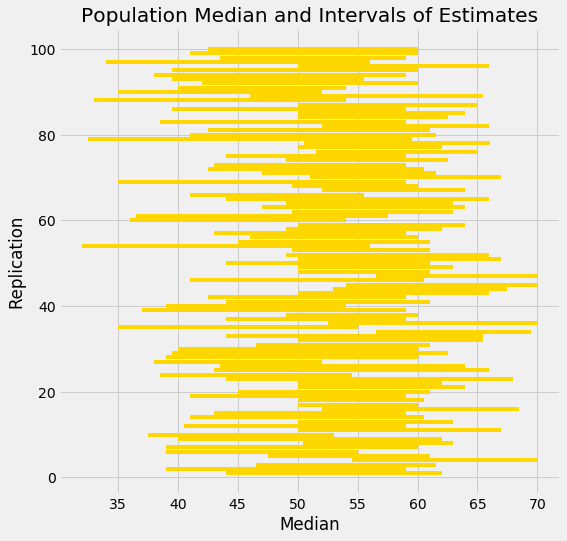

In [19]:
plots.figure(figsize=(8,8))
for i in np.arange(100):
    ends = intervals.iloc[i, :]
    plots.plot(ends, np.array([i + 1, i + 1]), color='gold')
plots.xlabel('Median')
plots.ylabel('Replication')
plots.title('Population Median and Intervals of Estimates');